# Conversion Rate

## Goal 
Optimizing conversion rate is likely the most common work of a data scientist, and rightfully so.

## Challenge Description
Data is about users who hit this site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).
This project is intended to:

#### 1. Predict conversion rate 
#### 2. Come up with recommendations for the product team and the marketing team to improve conversion rate

### Import relevant libraries

In [2]:
import os,sys
import xlrd
import math
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import decomposition
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn import metrics as mt
from sklearn import svm

In [3]:
data = pd.read_csv("conversion_data.csv")

### Examine raw dimensions of data

In [4]:
data.shape

(316200, 6)

### View head of data

In [218]:
data.head(8)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0


### View tail of raw data

In [219]:
data.tail(8)

,country,age,new_user,source,total_pages_visited,converted
316192,China,35,1,Seo,7,0
316193,UK,32,1,Direct,5,0
316194,UK,28,0,Seo,8,0
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0
316199,UK,24,0,Ads,4,0


### Check attribute data types

In [220]:
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

### Exploring missing values and imputing them appropriately

In [5]:
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

## Data Understanding
Simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you
found something interesting.

In [6]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


A few quick observations:

1. the site is probably a US site, although it does have a large Chinese user base as well

2. user base is pretty young

3. conversion rate at around 3% is industry standard. It makes sense.

4. everything seems to make sense here except for max age 123 yrs! Let’s investigate it:

#### Age of 123 does not makes any sense !!

#### Filtering out incorrect age entries

In [223]:
data_age_sorted = data.sort(['age'], ascending=[1])

In [224]:
data_age_sorted['age'].unique()

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  72,  73,  77,  79, 111, 123])

In [225]:
data = data[data['age'] <=79]


###  Visualize the most important attributes appropriately 


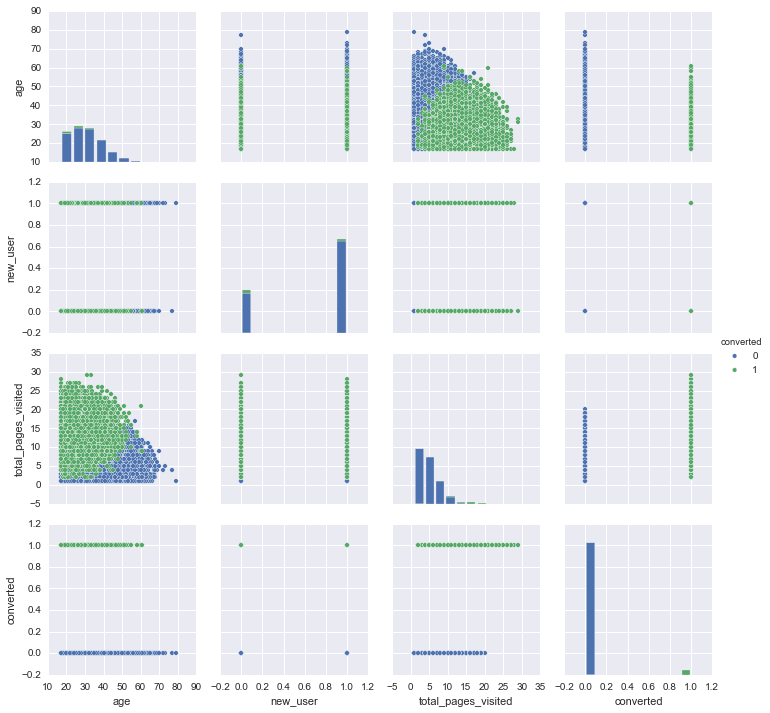

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
plt.figure()
sns.pairplot(data=data, hue = 'converted')


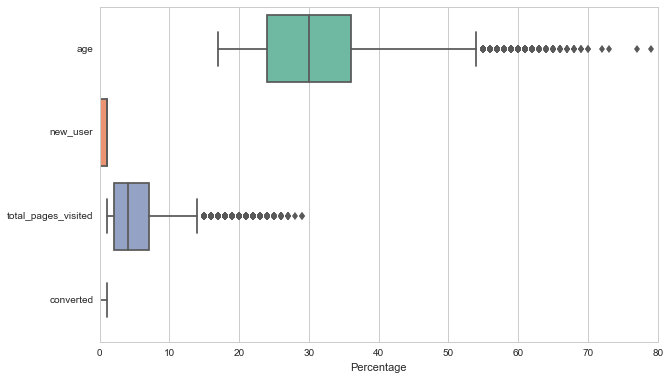

In [64]:
plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")
ax = sns.boxplot(data=data, orient="h", palette="Set2", saturation = .8, fliersize = 6.)
sns.axlabel("Percentage", "")

In [161]:
b=data.groupby('country').mean()

In [162]:
b

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.442895,0.677288,5.189966,0.062428
UK,30.449875,0.679849,5.082066,0.052612
US,30.566482,0.681985,4.930160,0.037801


### Here it clearly looks like Chinese convert at a much lower rate than other countries!

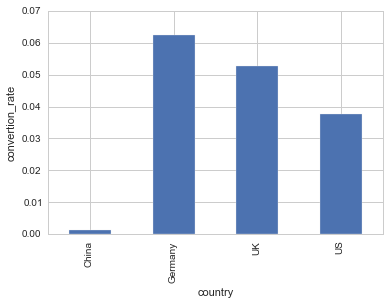

In [69]:
ax = b['converted'].plot(kind = 'bar', x = 'country', y = 'convertion_rate')

ax.set_xlabel("country")

ax.set_ylabel("convertion_rate")


In [70]:
df = data

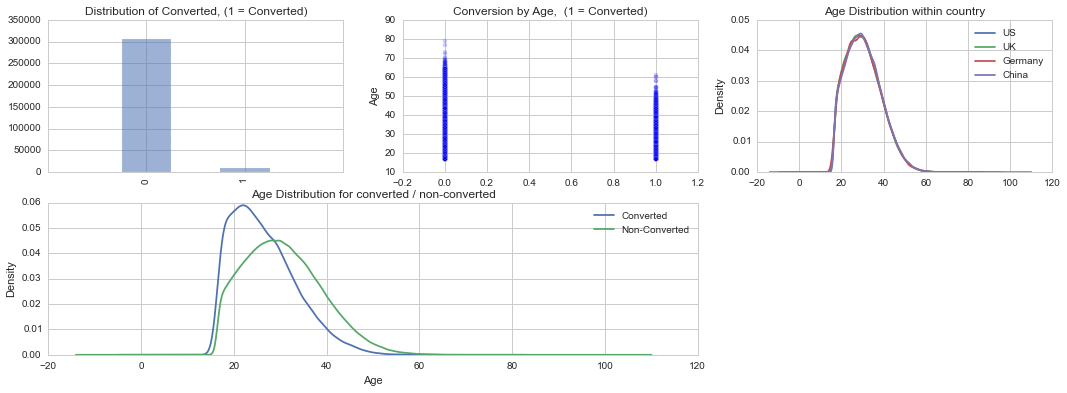

In [154]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.converted.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Converted, (1 = Converted)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.converted, df.age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Conversion by Age,  (1 = Converted)")

ax3 = plt.subplot2grid((2,3),(0,2))

plt.title("Age Distribution within country")  
df.age[df.country == "US"].plot(kind='kde')
df.age[df.country == "UK"].plot(kind='kde')    
df.age[df.country == "Germany"].plot(kind='kde')    
df.age[df.country == "China"].plot(kind='kde')  
plt.legend(('US', 'UK', 'Germany','China'),loc='best') 

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset 
df.age[df.converted == 1].plot(kind='kde')    
df.age[df.converted == 0].plot(kind='kde')


 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution for converted / non-converted")
# sets our legend for our graph.
plt.legend(('Converted', 'Non-Converted'),loc='best') 



### Conclusion: 

1. Age distribution for each country us same

2. Younger population have higher chances of conversion

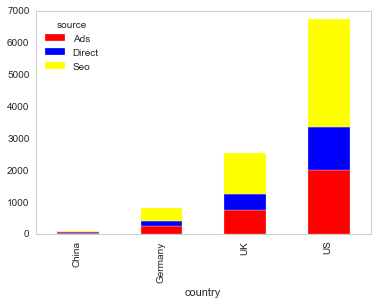

In [98]:
var = df.groupby(['country','source']).converted.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow'], grid=False)



## Evaluating population factor i.e. 

### % of poplulation per country converted and 

### % of country poplulation (share) amongst entire data set

In [138]:
A=[]
B =[]

In [139]:
list_of_countries = {'China','US','UK','Germany'}
def print_percentage_conversion (list_of_countries):
    for country in list_of_countries:
        df_converted = df[df['converted'] == 1]
        df_country_converted = df_converted[df_converted['country'] == country]
        A.append(len(df_country_converted))
        df_country_total = df[df['country'] == country]
        B.append(len(df_country_total))
        print country,"-", len(df_country_converted)/float(len(df_country_total))

In [140]:
print_percentage_conversion (list_of_countries)

China - 0.00133155792277
Germany - 0.0624281884336
US - 0.0378006872852
UK - 0.052612025016


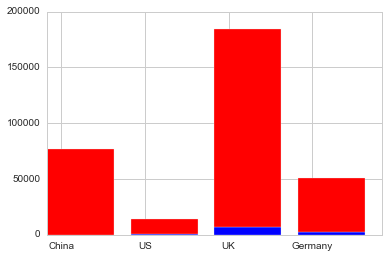

In [152]:
X = range(4)

plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r', bottom = A)
plt.xticks(np.arange(4)+0.17, ('China','US','UK','Germany'))
plt.show()

In [127]:
list_of_countries = {'China','US','UK','Germany'}
def print_percentage_country (list_of_countries):
    for country in list_of_countries:
        #df_converted = df[df['converted'] == 1]
        #df_country_converted = df_converted[df_converted['country'] == country]
        df_country = df[df['country'] == country]
        print country,"-", len(df_country)/float(len(df))

In [128]:
print_percentage_country(list_of_countries)

China - 0.242259596835
Germany - 0.0412874211728
US - 0.56322936894
UK - 0.153223613053


<p><a href="#top">Return to top</a></p>
<a id="modelingAndEvaluation"></a>
## Modeling and Evaluation


### One hot encoding for country and source

In [226]:
cols =['source','country']

In [227]:
data_1 = data[cols]

In [228]:
data_dummies = pd.get_dummies(data_1)

In [230]:
result_df = pd.concat([data_dummies, data], axis=1)

In [231]:
del result_df['source']

In [232]:
del result_df['country']

In [289]:
result_df.head(9)

,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US,age,new_user,total_pages_visited,converted
0,1,0,0,0,0,1,0,25,1,1,0
1,0,0,1,0,0,0,1,23,1,5,0
2,0,0,1,0,0,0,1,28,1,4,0
3,0,0,1,1,0,0,0,39,1,5,0
4,0,0,1,0,0,0,1,30,1,6,0
5,0,0,1,0,0,0,1,31,0,1,0
6,0,0,1,1,0,0,0,27,1,4,0
7,1,0,0,0,0,0,1,23,0,4,0
8,0,1,0,0,0,1,0,29,0,4,0


In [347]:
result_df_one = result_df[result_df['converted']==1]
print len(result_df_one)
print len(result_df)

10198
316198


In [348]:
result_df_zero = result_df[result_df['converted']==0]


In [349]:
result_df_zero.reindex(np.random.permutation(result_df_zero.index))

,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US,age,new_user,total_pages_visited,converted
219528,0,0,1,0,0,0,1,28,1,5,0
22203,0,0,1,0,0,1,0,25,1,6,0
183052,0,0,1,0,1,0,0,26,0,2,0
215608,1,0,0,0,0,0,1,41,1,4,0
53451,0,1,0,0,0,0,1,25,0,1,0
162424,1,0,0,0,0,0,1,27,1,10,0
259953,0,0,1,1,0,0,0,18,1,3,0
149465,0,0,1,0,0,1,0,42,1,4,0
102636,0,1,0,0,0,0,1,39,0,5,0
51253,1,0,0,0,0,0,1,43,1,3,0


In [339]:
result = result_df_one.append(result_df_zero)

In [340]:
result.reindex(np.random.permutation(result.index))

,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US,age,new_user,total_pages_visited,converted
128934,1,0,0,0,0,0,1,25,0,13,1
73553,0,1,0,1,0,0,0,21,1,5,0
75700,0,0,1,0,0,0,1,39,0,2,0
58830,0,0,1,0,0,0,1,29,1,2,0
37010,1,0,0,0,0,0,1,33,0,4,0
62986,1,0,0,0,1,0,0,32,0,5,0
67287,0,1,0,0,0,0,1,20,0,3,0
27263,0,0,1,0,0,0,1,30,0,4,0
61633,0,1,0,0,0,0,1,30,0,6,0
70455,0,1,0,0,0,0,1,17,1,9,0


In [234]:
features = list(result_df.columns.values)


In [235]:
features

['source_Ads',
 'source_Direct',
 'source_Seo',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'age',
 'new_user',
 'total_pages_visited',
 'converted']

In [350]:
y = result_df['converted'].values
X = result_df[['source_Ads',
 'source_Direct',
 'source_Seo',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'age',
 'new_user']].values

In [269]:
features_learn= ['source_Ads',
 'source_Direct',
 'source_Seo',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'age',
 'new_user']

In [270]:
result_df[['source_Ads',
 'source_Direct',
 'source_Seo',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'age',
 'new_user']].describe()

,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US,age,new_user
count,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000
mean,0.280644,0.229034,0.490323,0.242260,0.041287,0.153224,0.563229,30.569311,0.685469
std,0.449314,0.420212,0.499907,0.428451,0.198955,0.360203,0.495987,8.268958,0.464329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,36.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79.000000,1.000000


## Comparing different classification models - ensemble

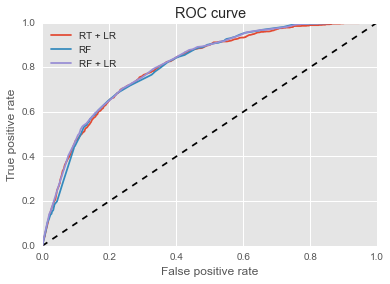

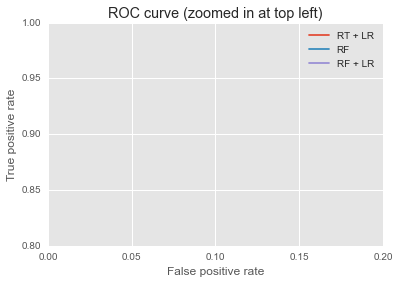

In [351]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

from sklearn import metrics as mt


n_estimator = 10
#X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=30, n_estimators=n_estimator)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator, class_weight = "auto" )
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

#grd = GradientBoostingClassifier(n_estimators=n_estimator)
#grd_enc = OneHotEncoder()
#grd_lm = LogisticRegression()
#grd.fit(X_train, y_train)
#grd_enc.fit(grd.apply(X_train)[:, :, 0])
#grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

#y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
#fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)


# The gradient boosted model by itself
#y_pred_grd = grd.predict_proba(X_test)[:, 1]
#fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
#plt.plot(fpr_grd, tpr_grd, label='GBT')
#plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
#plt.plot(fpr_grd, tpr_grd, label='GBT')
#plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()


In [300]:
#del result_df['converted']

## Important Feature from random forest

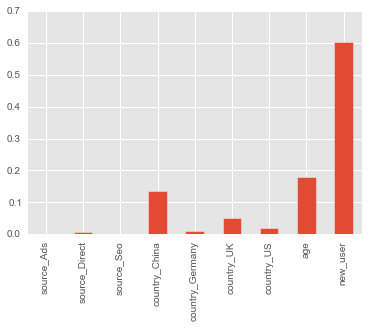

In [283]:
# get the importances

                          
imp =rf.feature_importances_

imp_features = pd.Series(imp,index=['source_Ads',
 'source_Direct',
 'source_Seo',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'age',
 'new_user'])
imp_features.plot(kind='bar')
plt.show()

## Random Forest - Classfication Report, ROC

ROC AUC: 0.82


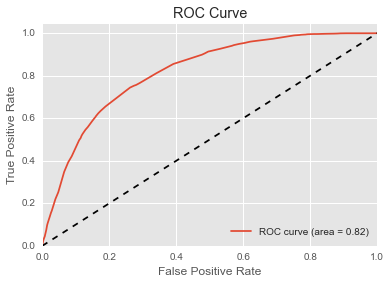

accuracy 0.716089285827
confusion matrix
[[109332  43668]
 [  1218   3881]]
[ 0.98342627  0.98276955  0.98572513 ...,  0.95907404  0.98291884
  0.98276955]
             precision    recall  f1-score   support

          0       0.99      0.71      0.83    153000
          1       0.08      0.76      0.15      5099

avg / total       0.96      0.72      0.81    158099



In [363]:
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
rf.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

y_hat = rf.predict(X_test)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print "accuracy", acc 
print "confusion matrix\n",conf
print y_pred_randomforest

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

## Logistic Regression - Classfication Report, ROC

In [368]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, class_weight="auto") # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,result_df.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print name, 'has weight of', coef[0] # now print them out

accuracy: 0.726424582066
[[110959  42041]
 [  1211   3888]]

source_Seo has weight of 0.0105135522587
source_Ads has weight of 0.0210768738751
source_Direct has weight of -0.0351067624689
country_Germany has weight of 0.285788446633
country_UK has weight of 0.442927860838
country_US has weight of 0.447687705254
age has weight of -0.595913529227
new_user has weight of -0.757641002619
country_China has weight of -1.02251578895


accuracy: 0.726424582066
[[110959  42041]
 [  1211   3888]]

ROC AUC: 0.63


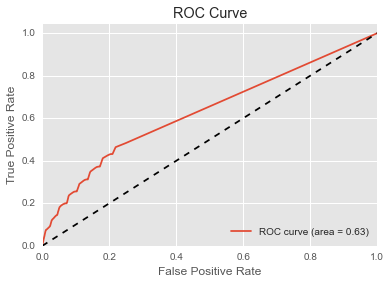

             precision    recall  f1-score   support

          0       0.99      0.73      0.84    153000
          1       0.08      0.76      0.15      5099

avg / total       0.96      0.73      0.81    158099



In [370]:
# Determine the false positive and true positive rates
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print 'accuracy:', acc 
print conf
print 

fpr, tpr, _ = roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])

#y_hat = lr_clf.predict(X_test)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

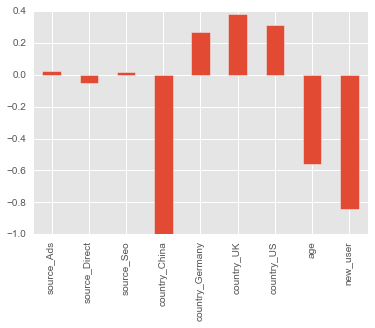

In [324]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0], index = ['source_Ads',
 'source_Direct',
 'source_Seo',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'age',
 'new_user'])
weights.plot(kind='bar')
plt.show()

## Not too much difference in accuracy bw random forest & logistic regression

## Using Patsy's dmatrices to avoid one hot encoding

In [9]:
# Create an acceptable formula for our machine learning algorithms
formula_ml = 'converted ~ C(country) + C(source) + age+ new_user'

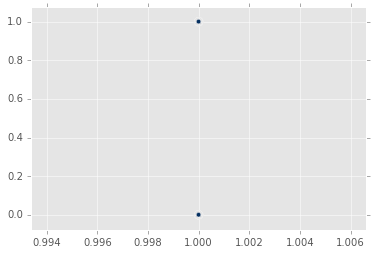

In [10]:
#set plotting parameters
from patsy import dmatrices
plt.figure(figsize=(8,6))

# create a regression friendly data frame
y, x = dmatrices(formula_ml, data=data, return_type='matrix')

# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs,
# [3,6] -- very long complex dbs, could take over an hour to calculate! 
feature_1 = 0
feature_2 = 2

X = np.asarray(x)
X = X[:,[feature_1, feature_2]]  


y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten()      

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)

# do a cross validation
nighty_precent_of_sample = int(.9 * n_sample)
X_train = X[:nighty_precent_of_sample]
y_train = y[:nighty_precent_of_sample]
X_test = X[nighty_precent_of_sample:]
y_test = y[nighty_precent_of_sample:]

# create a list of the types of kerneks we will use for your analysis
#types_of_kernels = ['linear', 'rbf', 'poly']
types_of_kernels = ['linear']


# specify our color map for plotting the results
color_map = plt.cm.RdBu_r

# fit the model
for fig_num, kernel in enumerate(types_of_kernels):
    clf = svm.SVC(kernel=kernel, gamma=3, )
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)

    # circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

#     # put the result into a color plot
#     Z = Z.reshape(XX.shape)
#     plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
#     plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
#                levels=[-.5, 0, .5])

#     plt.title(kernel)
#     plt.show()

ROC AUC: 0.80


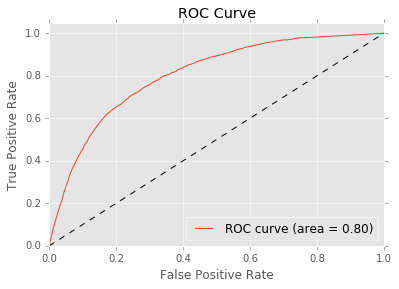

accuracy 0.751638203669
confusion matrix
[[115237  37789]
 [  1477   3597]]
[ 0.  0.  0. ...,  0.  1.  0.]
             precision    recall  f1-score   support

        0.0       0.99      0.75      0.85    153026
        1.0       0.09      0.71      0.15      5074

avg / total       0.96      0.75      0.83    158100



In [13]:
from sklearn.metrics import roc_curve, auc
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske
from patsy import dmatrices


# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=data, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
#y = np.asarray(y).ravel()
#instantiate and fit our model

X = np.asarray(x)
y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten() 
n_sample = len(X)
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)
# do a cross validation
precent_of_sample = int(.5 * n_sample)
X_train = X[:precent_of_sample]
y_train = y[:precent_of_sample]
X_test = X[precent_of_sample:]
y_test = y[precent_of_sample:]


rf = ske.RandomForestClassifier(n_estimators=100, class_weight = 'auto').fit(X_train, y_train)

rf.fit(X_train, y_train)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

y_hat = rf.predict(X_test)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print "accuracy", acc 
print "confusion matrix\n",conf
print y_hat

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

## Some conclusions and suggestions:
1. The site is working very well for young users. Definitely let’s tell marketing to advertise and use
marketing channel which are more likely to reach young people.
2. The site is working very well for Germany in terms of conversion. But the summary showed that
there are few Germans coming to the site: way less than UK, despite a larger population. Again,
marketing should get more Germans. Big opportunity.
3. Users with old accounts do much better. Targeted emails with offers to bring them back to the site
could be a good idea to try.
4. Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the
local culture, some payment issue or maybe it is just in English! Given how many users are based in
China, fixing this should be a top priority. Huge opportunity.
5. Maybe go through the UI and figure out why older users perform so poorly? From 30 y/o conversion
clearly starts dropping.
6. If I know someone has visited many pages, but hasn’t converted, she almost surely has high
purchase intent. I could email her targeted offers or sending her reminders. Overall, these are
probably the easiest users to make convert.


## As we can see, conclusions usually end up being about:
1. tell marketing to get more of the good performing user segments
2. tell product to fix the experience for the bad performing ones